# <p style='text-align: center;'> Hyperparameter Tuning with GridSearchCV </p>

## What is GridSearchCV?
- **GridSearchCV** is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.


- the performance of a model significantly depends on the value of **hyperparameters**. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. 


- Doing this manually could take a considerable amount of time and resources and thus we use **GridSearchCV** to automate the tuning of hyperparameters.


- **GridSearchCV** is a function that comes in **Scikit-learn’s(or SK-learn) model_selection package**.So an important point here to note is that we need to have the **Scikit learn** library installed on the computer. This function helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.

## How does GridSearchCV work?
- As mentioned above, we pass predefined values for hyperparameters to the GridSearchCV function. We do this by defining a dictionary in which we mention a particular hyperparameter along with the values it can take. Here is an example of it:

<b> Example:
    
- <b> { 'C': [0.1, 1, 10, 100, 1000],  'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf',’linear’,'sigmoid'] }
    
    
- Here C, gamma and kernels are some of the hyperparameters of an SVM model. Note that the rest of the hyperparameters will be set to their default values

    
- GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

## How to use GridSearchCV?
In this section, we shall see how to use GridSearchCV and also find out how it improves the performance of the model.

First, let us see what are the various arguments that are taken by GridSearchCV function:

<b> sklearn.model_selection.GridSearchCV(estimator, param_grid,scoring=None, n_jobs=None, iid='deprecated', 
                                     refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', 
                                     error_score=nan, return_train_score=False) 
    
    
We are going to briefly describe a few of these parameters, they are:
    
- **1. estimator:** Pass the model instance for which you want to check the hyperparameters.
    
    
- **2. params_grid:** the dictionary object that holds the hyperparameters you want to try
    
    
- **3. scoring:** evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric
    
    
- **4. cv:** number of cross-validation you have to try for each selected set of hyperparameters
    
    
- **5. verbose:** you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV
    
    
- **6. n_jobs:** number of processes you wish to run in parallel for this task if it -1 it will use all available processors.     

Now, let us see how to use **GridSearchCV** to improve the accuracy of our model. Here I am going to train the model twice, once without using GridsearchCV(using the default hyperparameters) and the other time we will use GridSearchCV to find the optimal values of hyperparameters for the dataset at hand. I am using the famous **Breast Cancer Wisconsin (Diagnostic) Data Set** which I am directly importing from the Scikit-learn library here.

In [1]:
#import all necessary libraries
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
 
#load the dataset and split it into training and testing sets
dataset = load_breast_cancer()
X=dataset.data
Y=dataset.target
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.30, random_state = 101) 
# train the model on train set without using GridSearchCV 
model = SVC() 
model.fit(X_train, y_train) 
   
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



<b> Let's applying Hyperparameter Tuning with GridSearchCV

In [3]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'], 'kernel': ['linear']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        66
           1       0.94      0.97      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



A lot of you might think that **{‘C’: 100, ‘gamma’: ‘scale’, ‘kernel’: ‘linear’}** are the best values for hyperparameters for an **SVM model**. This is not the case, the above-mentioned hyperparameters may be the best for the dataset we are working on. But for any other dataset, the SVM model can have different optimal values for hyperparameters that may improve its performance.

## Difference between parameter and hypermeter

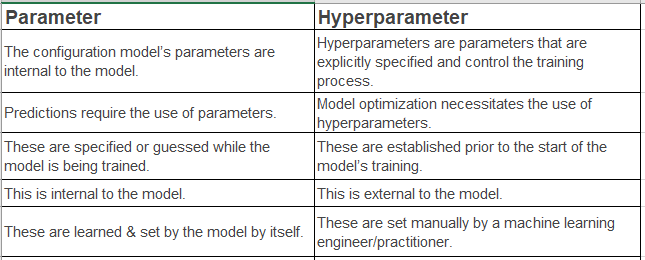

## Advantages and Disadvantages of GridSearchCV?

**Advantages:**
- Exhaustive search, will find the absolute best way to tune the hyperparameters based on the training set.

**Disadvantages:** 
- time-consuming, danger of overfitting.


- GridSearchCV will go through all the intermediate combinations of hyperparameters which makes grid search computationally very expensive.


- For example, if we want to set two hyperparameters C and Alpha of the Logistic Regression Classifier model, with different sets of values. The grid search technique will construct many versions of the model with all possible combinations of hyperparameters and will return the best one.